# Inv. Kin. mittels CCD (Cyclic Coordinate Descent) lösen 

##  Ein Bspl. in 2D

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

PI = 3.1415926535

In [2]:
# HTM matrix functions
def DH4x4(T,A,a,d):
    H = np.array([[1.0,0.0,0.0,0.0],[0.0,1.0,0.0,0.0],[0.0,0.0,1.0,0.0],[0.0,0.0,0.0,1.0]])   
    H[0,0] =  math.cos(T)
    H[0,1] = -math.sin(T)*math.cos(A)
    H[0,2] =  math.sin(T)*math.sin(A)
    H[0,3] =  a*math.cos(T)
    H[1,0] =  math.sin(T)
    H[1,1] =  math.cos(T)*math.cos(A)
    H[1,2] = -math.cos(T)*math.sin(A)
    H[1,3] =  a*math.sin(T)
    H[2,0] = 0
    H[2,1] = math.sin(A)
    H[2,2] = math.cos(A)
    H[2,3] = d
    return H

def plot4x4Mat(m):
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[0,0],m[0,1],m[0,2],m[0,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[1,0],m[1,1],m[1,2],m[1,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[2,0],m[2,1],m[2,2],m[2,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[3,0],m[3,1],m[3,2],m[3,3]))
    return

def plot3DVec(m):
    print("[%6.2f]"%(m[0,0]))
    print("[%6.2f]"%(m[1,0]))
    print("[%6.2f]"%(m[2,0]))
    return

def pos4x4HTM(m):
    r = np.array([[m[0,3]],[m[1,3]],[m[2,3]]])
    return r

def VecD3ToD2(m):
    r = np.array([[m[0,0]],[m[1,0]]])
    return r

def VecD4ToD3(m):
    r = np.array([[m[0,0]],[m[1,0]],[m[2,0]]])
    return r

In [3]:
# CCD functions

    
def skalar(a,b):
    l = (float(a[0,0])*float(b[0,0])) + (float(a[1,0])*float(b[1,0])) + (float(a[2,0])*float(b[2,0]))
    return float(l);

def betrag(a):
    l = (float(a[0,0])*float(a[0,0])) + (float(a[1,0])*float(a[1,0])) + (float(a[2,0])*float(a[2,0]))
    return float(math.sqrt(l))

def winkel(a,b):
    angle = skalar(a,b)/(betrag(a)*betrag(b))
    return float(math.acos(angle))
    
def kreuz(a,b):
    r = np.array([[0],[0],[0]])
    r[0,0] =  ( float(a[1,0])*float(b[2,0]) ) - ( float(a[2,0])*float(b[1,0]) )
    r[1,0] =  ( float(a[2,0])*float(b[0,0]) ) - ( float(a[0,0])*float(b[2,0]) ) 
    r[2,0] =  ( float(a[0,0])*float(b[1,0]) ) - ( float(a[1,0])*float(b[0,0]) )
    return r

def CCDjointUpdate(G,P):
    deltaJ = float(winkel(G,P))
    kreuzJ = kreuz(G,P)
    if kreuzJ[2,0] < 0.0:
        deltaJ = 0.0 - deltaJ
    return deltaJ


In [4]:
# Plotting functions

def createFigure(fig, j0, j1, tcp_curr, tcp_goal):
    fig.set_xlim(-12,12)
    fig.set_ylim(-6,6)
    x = [j0[0,0],j1[0,0],tcp_curr[0,0]]
    y = [j0[1,0],j1[1,0],tcp_curr[1,0]]
    fig.scatter( j0[0,0],j0[1,0], s = 20 )
    fig.scatter( j1[0,0],j1[1,0], s = 20 )
    fig.scatter( tcp_curr[0,0],tcp_curr[1,0], s = 20 )
    fig.scatter( tcp_goal[0,0],tcp_goal[1,0], s = 20 )
    fig.plot(x,y);
    return

def createPlot(fig, j0, j1, tcp_curr, tcp_goal):
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    x = [j0[0,0],j1[0,0],tcp_curr[0,0]]
    y = [j0[1,0],j1[1,0],tcp_curr[1,0]]
    fig.scatter( j0[0,0],j0[1,0], s = 20 )
    fig.scatter( j1[0,0],j1[1,0], s = 20 )
    fig.scatter( tcp_curr[0,0],tcp_curr[1,0], s = 20 )
    fig.scatter( tcp_goal[0,0],tcp_goal[1,0], s = 20 )
    fig.plot(x,y);
    return


In [5]:
# TCP point target position
x = 3.0
y = 2.0
z = 0.0
TCP_GOAL = np.array([[x],[y],[z],[1]])

In [6]:
#robot 2D - DH parameters
a1 = 3.0
a2 = 2.0
phi0 = 0.0
phi1 = 0.0

In [7]:
# HTMs
T_1_0 = DH4x4(phi0+(PI/2),0.0,a1,0.0)
T_2_1 = DH4x4(phi1,0.0,a2,0.0)
T_2_0 = T_1_0 @ T_2_1

In [8]:
# derive coordinates of joints and TCP
TCP_CURR = pos4x4HTM(T_2_0)
J1 = pos4x4HTM(T_1_0)
J0 = np.array([[0],[0],[0]])

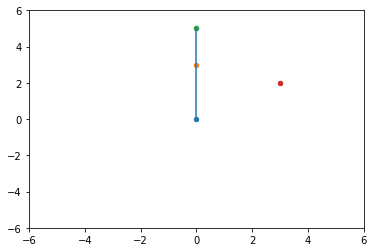

In [9]:
# draw robot
createPlot(plt,J0,J1,TCP_CURR,TCP_GOAL)
plt.show()

In [10]:
# J1 update via DH parameters
#
# get vectors
G1 =VecD4ToD3(TCP_GOAL) - pos4x4HTM(T_1_0) 
P1 = pos4x4HTM(T_2_0) - pos4x4HTM(T_1_0) 
# update DH parameters
a1 = a1
a2 = a2
phi1 = phi1 - CCDjointUpdate(G1,P1)
phi0 = phi0 
# create HTMs
T_1_0 = DH4x4(phi0+(PI/2),0,a1,0)
T_2_1 = DH4x4(phi1,0,a2,0)
T_2_0 = T_1_0 @ T_2_1

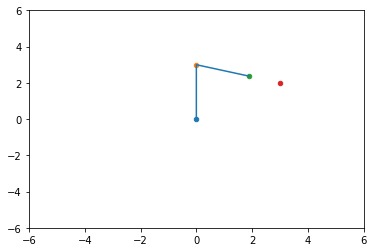

In [11]:
# Draw robot
#
# get coordinates of joints, TCP and target position of the TCP
TCP_CURR = pos4x4HTM(T_2_0)
J1 = pos4x4HTM(T_1_0)
J0 = np.array([[0],[0],[0]])
# plot the robot
createPlot(plt,J0,J1,TCP_CURR,TCP_GOAL)
plt.show()

In [12]:
# J0 update via DH parameters
#
# get vectors
G0 =VecD4ToD3(TCP_GOAL)
P0 = pos4x4HTM(T_2_0) 
# update DH parameters
a1 = a1
a2 = a2
phi1 = phi1 
phi0 = phi0 - CCDjointUpdate(G0,P0)
# create HTMs
T_1_0 = DH4x4(phi0+(PI/2),0,a1,0)
T_2_1 = DH4x4(phi1,0,a2,0)
T_2_0 = T_1_0 @ T_2_1

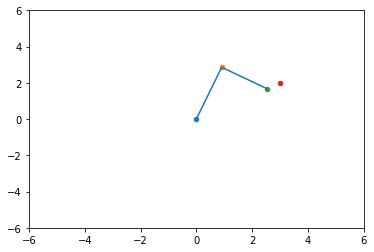

In [13]:
# Draw robot
#
# get coordinates of joints, TCP and target position of the TCP
TCP_CURR = pos4x4HTM(T_2_0)
J1 = pos4x4HTM(T_1_0)
J0 = np.array([[0],[0],[0]])
# plot the robot
createPlot(plt,J0,J1,TCP_CURR,TCP_GOAL)
plt.show()

In [14]:
# J1 update via DH parameters
#
# get vectors
G1 =VecD4ToD3(TCP_GOAL) - pos4x4HTM(T_1_0) 
P1 = pos4x4HTM(T_2_0) - pos4x4HTM(T_1_0) 
# update DH parameters
a1 = a1
a2 = a2
phi1 = phi1 - CCDjointUpdate(G1,P1)
phi0 = phi0 
# create HTMs
T_1_0 = DH4x4(phi0+(PI/2),0,a1,0)
T_2_1 = DH4x4(phi1,0,a2,0)
T_2_0 = T_1_0 @ T_2_1

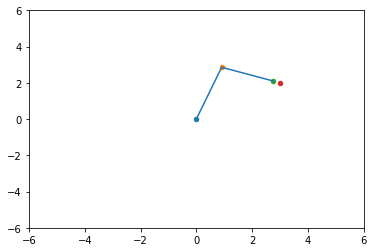

In [15]:
# Draw robot
#
# get coordinates of joints, TCP and target position of the TCP
TCP_CURR = pos4x4HTM(T_2_0)
J1 = pos4x4HTM(T_1_0)
J0 = np.array([[0],[0],[0]])
# plot the robot
createPlot(plt,J0,J1,TCP_CURR,TCP_GOAL)
plt.show()

In [16]:
# J0 update via DH parameters
#
# get vectors
G0 =VecD4ToD3(TCP_GOAL)
P0 = pos4x4HTM(T_2_0) 
# update DH parameters
a1 = a1
a2 = a2
phi1 = phi1 
phi0 = phi0 - CCDjointUpdate(G0,P0)
# create HTMs
T_1_0 = DH4x4(phi0+(PI/2),0,a1,0)
T_2_1 = DH4x4(phi1,0,a2,0)
T_2_0 = T_1_0 @ T_2_1

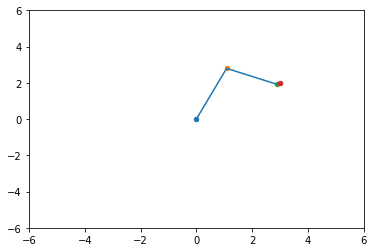

In [17]:
# Draw robot
#
# get coordinates of joints, TCP and target position of the TCP
TCP_CURR = pos4x4HTM(T_2_0)
J1 = pos4x4HTM(T_1_0)
J0 = np.array([[0],[0],[0]])
# plot the robot
createPlot(plt,J0,J1,TCP_CURR,TCP_GOAL)
plt.show()

### Demo

#### Setzen des Zielpunkts

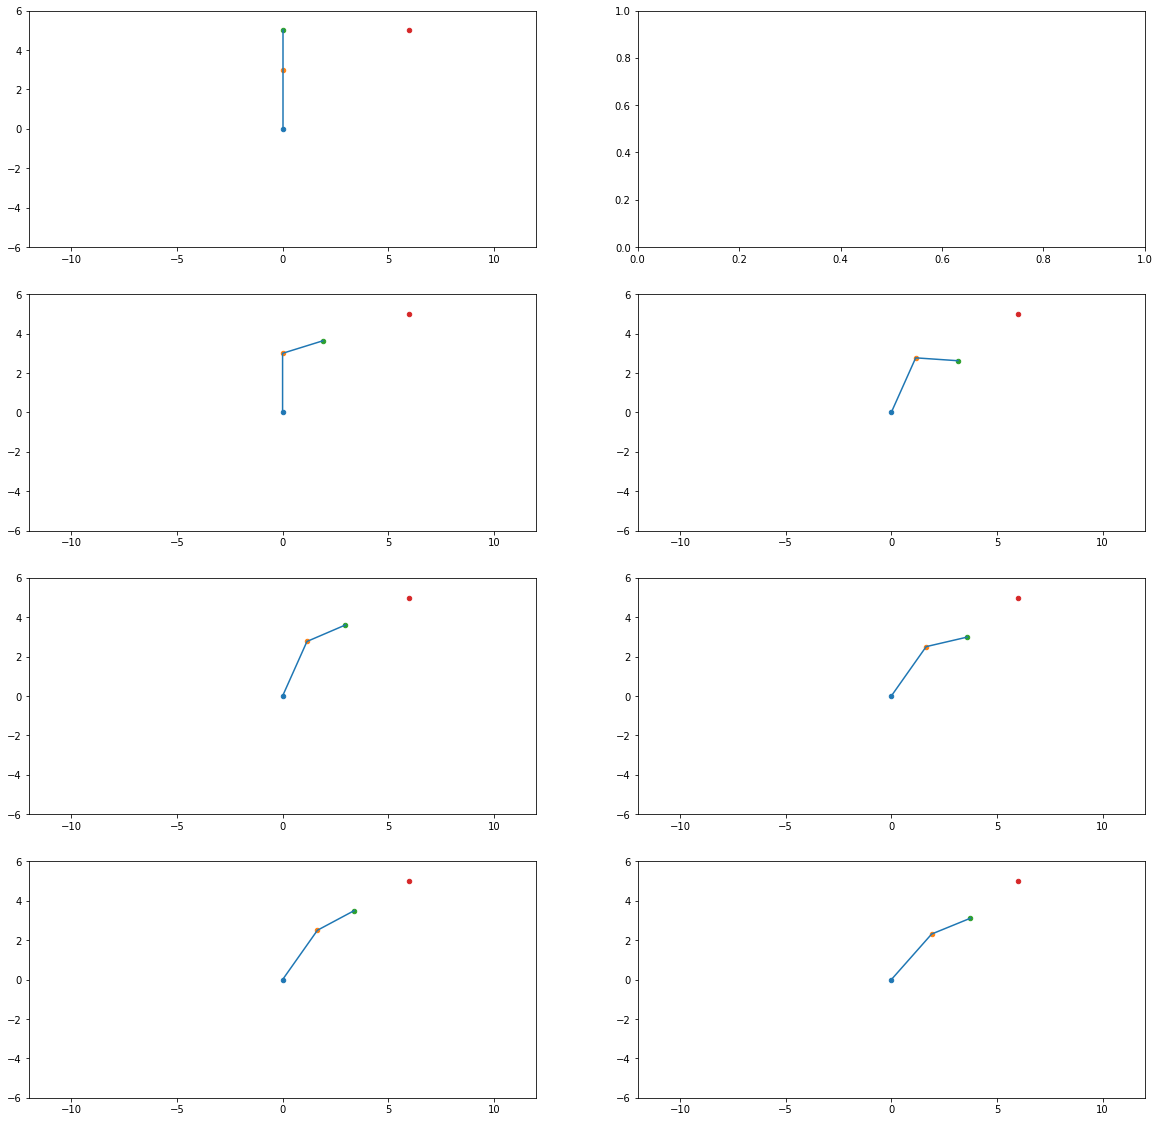

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 20]
fig,a =  plt.subplots(4,2)

#Start robot 2D
a1 = 3.0
a2 = 2.0
phi0 = 0.0
phi1 = 0.0
T_1_0 = DH4x4(phi0+(PI/2),0.0,a1,0.0)
T_2_1 = DH4x4(phi1,0.0,a2,0.0)
T_2_0 = T_1_0 @ T_2_1
# joints and  TCP
TCP_CURR = pos4x4HTM(T_2_0)
J1 = pos4x4HTM(T_1_0)
J0 = np.array([[0],[0],[0]])
# Goal of the TCP
x = 6.0
y = 5.0
z = 0.0
TCP_GOAL = np.array([[x],[y],[z],[1]])

createFigure(a[0][0],J0,J1,TCP_CURR,TCP_GOAL)


for i in range(1,4):
        # J1 update via DH parameters
        #
        # get vectors
        G1 =VecD4ToD3(TCP_GOAL) - pos4x4HTM(T_1_0) 
        P1 = pos4x4HTM(T_2_0) - pos4x4HTM(T_1_0) 
        # update DH parameters
        a1 = a1
        a2 = a2
        phi1 = phi1 - CCDjointUpdate(G1,P1)
        phi0 = phi0 
        # create HTMs
        T_1_0 = DH4x4(phi0+(PI/2),0,a1,0)
        T_2_1 = DH4x4(phi1,0,a2,0)
        T_2_0 = T_1_0 @ T_2_1 
        # Draw robot
        #
        # get coordinates of joints, TCP and target position of the TCP
        TCP_CURR = pos4x4HTM(T_2_0)
        J1 = pos4x4HTM(T_1_0)
        J0 = np.array([[0],[0],[0]])
        # plot the robot
        createFigure(a[i][0],J0,J1,TCP_CURR,TCP_GOAL)


        ###
        # J0 update
        G0 =VecD4ToD3(TCP_GOAL)
        P0 = pos4x4HTM(T_2_0) 
        # update DH parameters
        a1 = a1
        a2 = a2
        phi1 = phi1;
        phi0 = phi0  - CCDjointUpdate(G0,P0)
        # create HTMs
        T_1_0 = DH4x4(phi0+(PI/2),0,a1,0)
        T_2_1 = DH4x4(phi1,0,a2,0)
        T_2_0 = T_1_0 @ T_2_1 
        # Draw robot
        #
        # get coordinates of joints, TCP and target position of the TCP
        TCP_CURR = pos4x4HTM(T_2_0)
        J1 = pos4x4HTM(T_1_0)
        J0 = np.array([[0],[0],[0]])
        # plot the robot
        createFigure(a[i][1],J0,J1,TCP_CURR,TCP_GOAL)


plt.show()


